In [7]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
titanic_data = pd.read_csv('train.csv')

In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived

In [12]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [13]:
X=pd.get_dummies(X)

In [14]:
X = X.fillna({'Age': X.Age.median()})

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)

In [50]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

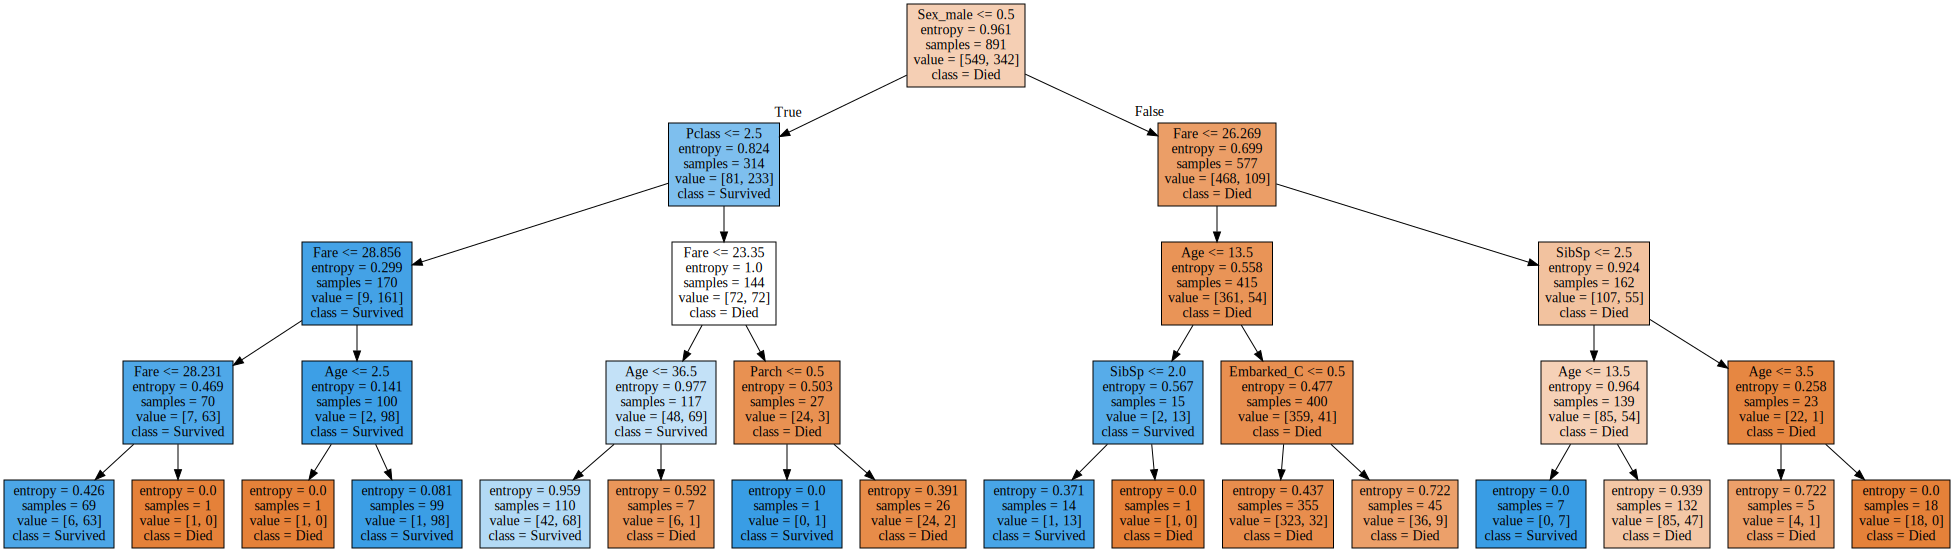

In [51]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;</style>"
HTML( style )
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [52]:
import pydotplus
export = tree.export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(export)  
graph.write_pdf("titanic.pdf")
graph.write_png("titanic.png")

True

In [20]:
pip list

Package                            Version   
---------------------------------- ----------
alabaster                          0.7.12    
anaconda-client                    1.7.2     
anaconda-navigator                 1.9.12    
anaconda-project                   0.8.3     
argh                               0.26.2    
asn1crypto                         0.24.0    
astroid                            2.2.5     
astropy                            3.2.1     
atomicwrites                       1.3.0     
attrs                              19.1.0    
autopep8                           1.4.4     
Babel                              2.7.0     
backcall                           0.1.0     
backports.functools-lru-cache      1.5       
backports.os                       0.1.1     
backports.shutil-get-terminal-size 1.0.0     
backports.tempfile                 1.0       
backports.weakref                  1.0.post1 
bcrypt                             3.1.7     
beautifulsoup4                    

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
max_depth_values = range(1, 100)

In [23]:
scores_data = pd.DataFrame()

In [24]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score =clf.score(X_train, y_train)
    test_score =clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                               'train_score':[train_score],
                               'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)

In [47]:
scores_data[scores_data['test_score'] == scores_data['test_score'].max()]

,max_depth,train_score,test_score
0,4,0.833893,0.823729


In [ ]:
scores_data_long = scores_data.melt